Visualize the data from random runs projected onto the SRM space trained on the periodic runs.

In [302]:
import numpy as np
import hypertools as hyp
from os.path import join as pjoin
import matplotlib.pyplot as plt
import runpy
from scipy.signal import deconvolve
import seaborn as sns
from IPython.display import HTML

%matplotlib inline

In [187]:
sns.set_palette('colorblind')
sns.set_context('talk')

In [23]:
file_globals = runpy.run_path('srm_roi.py')
file_globals2 = runpy.run_path('decode_random_stimulation.py')
datagrabber = file_globals['datagrabber']
# load_data = file_globals['load_data']
grab_subject_ids = file_globals['grab_subject_ids']
make_periodic_labels =file_globals2['make_periodic_labels']
get_onsets_randomruns = file_globals2['get_onsets_randomruns']
randomruns_onsets_to_labels = file_globals2['randomruns_onsets_to_labels']

In [31]:
resdir = '/data/project/somato/scratch/project_random_stimulation'
dsdir = '/data/project/somato/scratch/dataset'

# get digit labels

In [24]:
periodic_labels_2d, periodic_labels_concat = make_periodic_labels()

In [35]:
subids = grab_subject_ids(ds_dir=dsdir, exclude_subs=('fip66'))
random_onsets = get_onsets_randomruns(subids, prepped_ds_dir=dsdir)
random_labels = randomruns_onsets_to_labels(random_onsets)
print(random_labels.shape)

subject ids : ['bmz426', 'clz082', 'oxi002', 'dgv970', 'yhx875', 'ben157', 'ulb827', 'ggx379', 'htr373', 'irh385', 'czg996', 'sul778', 'pdo804', 'aae961', 'npx529', 'tze824', 'zyr407', 'jlf001', 'kvv494', 'igf001', 'zmk890', 'oym138', 'guw502', 'nsu367', 'wtl296', 'sxp758', 'cqq680', 'mhc403', 'rev143']
(29, 2, 212)


# load results arrays

In [6]:
proj_respath = pjoin(resdir, 'proj_results.npy')
train_respath = pjoin(resdir, 'train_results.npy')

In [42]:
periodic_labels_2d.flatten().shape

(512,)

In [146]:
with open (train_respath, 'rb') as f:
    train_results = np.load(f)
    
# also reshape into two seperate runs
train_results_resh = train_results.reshape((29,10,2,256))

In [70]:
with open (proj_respath, 'rb') as f:
    proj_results = np.load(f)

In [74]:
print(train_results.shape)  # shape: nsubs, nfeatures, nvols_periodic
print(proj_results.shape)  # shape: nsubs, nruns, nfeatures, nvols_random

(29, 10, 512)
(29, 2, 10, 212)


# Check one or two trained models

In [165]:
subidx = 2

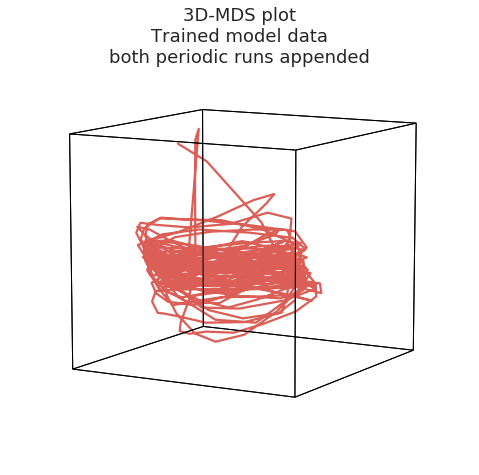

In [236]:
hyp.plot(train_results[subidx].T,
         fmt='-',
         reduce='PCA', 
         title='3D-MDS plot\nTrained model data\nboth periodic runs appended', 
         size=(7,7))

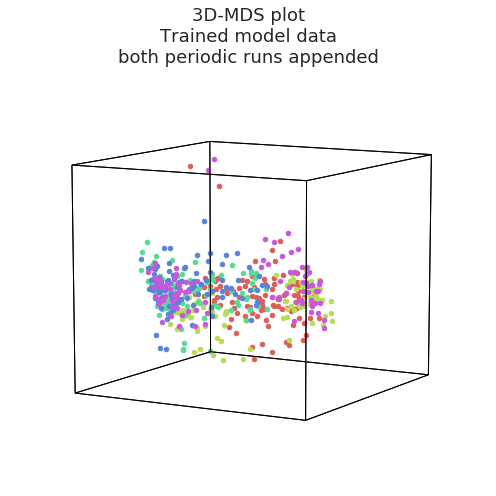

In [281]:
hyp.plot(train_results[subidx].T,
         hue=periodic_labels_2d.flatten(),
         fmt='.',
         reduce='PCA', 
         title='3D-MDS plot\nTrained model data\nboth periodic runs appended', 
         size=(7,7))

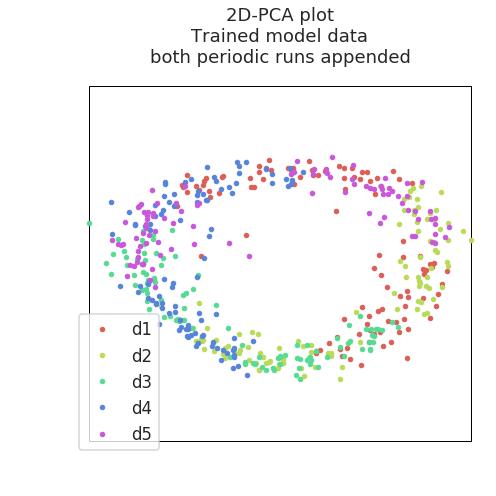

the model based on appended data looks like an overlay of the two models for the data from individual runs.
TODO: also plot the sections of the model for the individual runs


In [266]:
geom = hyp.plot(train_results[subidx].T, hue=periodic_labels_2d.flatten(), 
         fmt='.',
         reduce='PCA', 
         ndims=2,
         title='2D-PCA plot\nTrained model data\nboth periodic runs appended', 
         legend=['d%i' %i for i in range(1,6)],
         normalize=False,
         size=(7,7))

print("""the model based on appended data looks like an overlay of the two models for the data from individual runs.
TODO: also plot the sections of the model for the individual runs""")

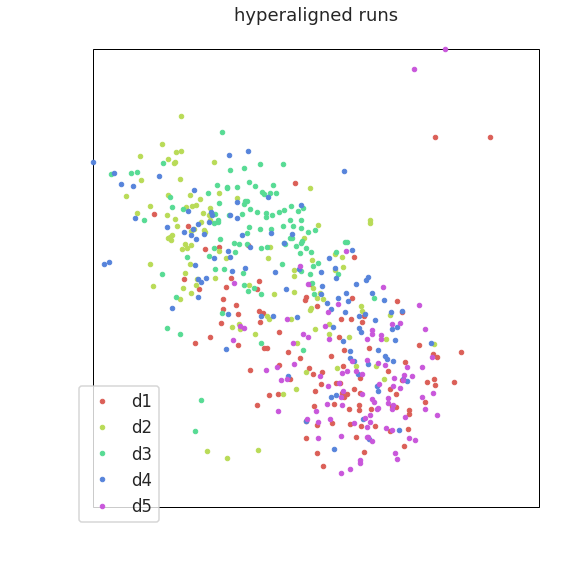

In [267]:
geom = hyp.plot([train_results_resh[subidx,0].T, train_results_resh[subidx,1].T], 
         fmt='.', 
         hue=periodic_labels_2d.flatten(), 
         reduce='PCA', 
         title='hyperaligned runs', 
         legend=['d%i' %i for i in range(1,6)],
         align=True,
         size=(8,8))

In [205]:
# print('tour through dimensions')
# for start_i in range(0,train_results.shape[1]-3):
#     hyp.plot(train_results[0,start_i:start_i+3,:].T, fmt='-')#, hue=periodic_labels_2d.flatten())

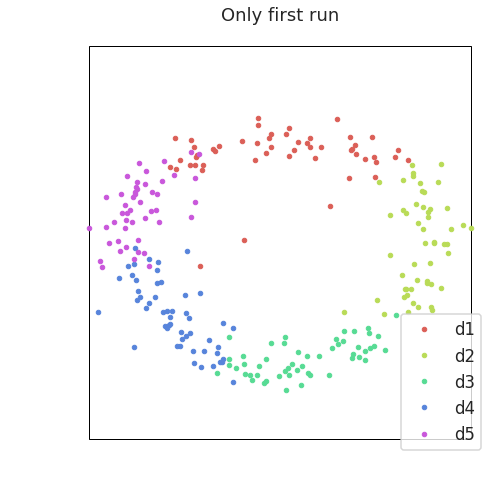

In [282]:
geom = hyp.plot(train_results[subidx,:,:256].T, 
                hue=periodic_labels_2d.flatten()[:256], 
                 fmt='.',
                 reduce='PCA', 
                 ndims=2,
                 title='Only first run', 
                 legend=['d%i' %i for i in range(1,6)],
                 normalize=False,
                 size=(7,7))

In [250]:
train_results.shape

(29, 10, 512)

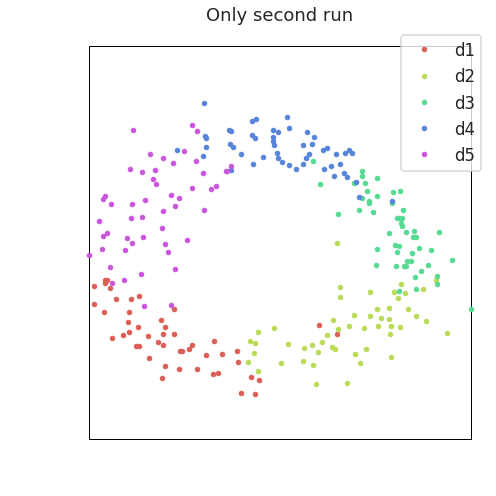

In [283]:
geom = hyp.plot(train_results[subidx,:,256:].T, hue=periodic_labels_2d.flatten()[256:], 
         fmt='.',
         reduce='PCA', 
         ndims=2,
         title='Only second run', 
         legend=['d%i' %i for i in range(1,6)],
         normalize=False,
         size=(7,7))

Plot the trajectory through shared space (PCA & MDS)

In [255]:
geo = hyp.plot(train_results[subidx].T,
         fmt='-',
         reduce='PCA',
#         title='3D-MDS plot\nTrained model data\nboth periodic runs appended', 
         size=(7,7),
         animate='parallel',
         frame_rate=10,
         tail_duration=1.,
         chemtrails=False,
#               zoom=1.5,
               show=False)

anim = geo.line_ani
HTML(anim.to_html5_video())

# Check the projected data

In [124]:
proj_results[subidx,runidx,:,:].T.shape

(212, 10)

In [122]:
random_labels[subidx,runidx,:].shape

(212,)

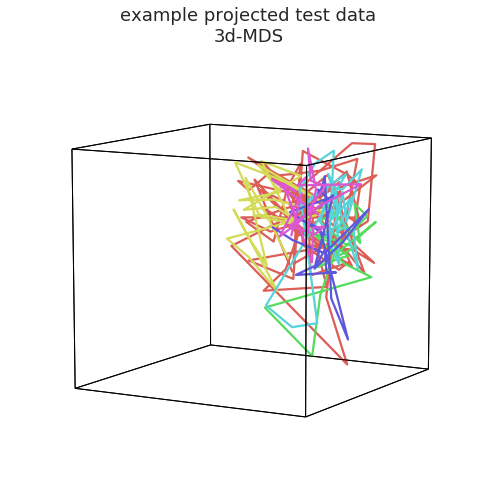

In [276]:
subidx, runidx = 1,0

hyp.plot(np.nan_to_num(proj_results[subidx,runidx,:,:].T),
         hue=random_labels[subidx,runidx,:],
         #legend=['baseline' + 'd%i' %i for i in range(1,6)],
         title='example projected test data\n3d-MDS',
         reduce='MDS',
        size=(7,7))

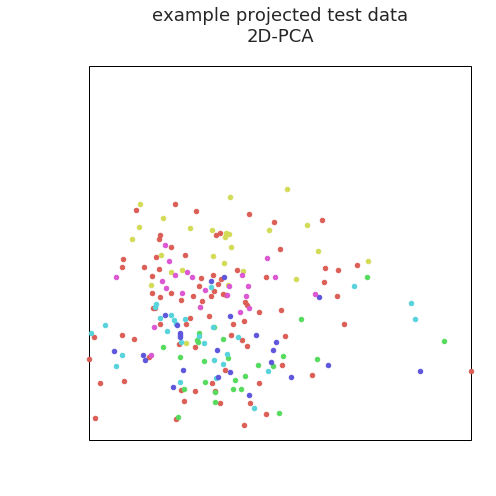

In [270]:
hyp.plot(np.nan_to_num(proj_results[subidx,runidx,:,:].T),
         hue=random_labels[subidx,runidx,:],
         fmt='.',
         #legend=['baseline' + 'd%i' %i for i in range(1,6)],
         title='example projected test data\n2D-PCA',
         reduce='PCA',
         ndims=2,
        size=(7,7))